In [ ]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get Data Analyst jobs in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values in salary_year_avg for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])


# Median salary based on top ten highest paying skills
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)


# Median salary based on top ten most demanding skills 
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


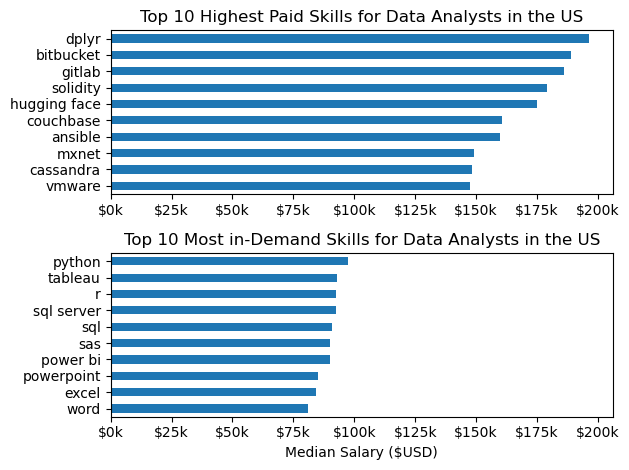

In [5]:
fig, ax = plt.subplots(2, 1,)

df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))

df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts in the US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))

fig.tight_layout()

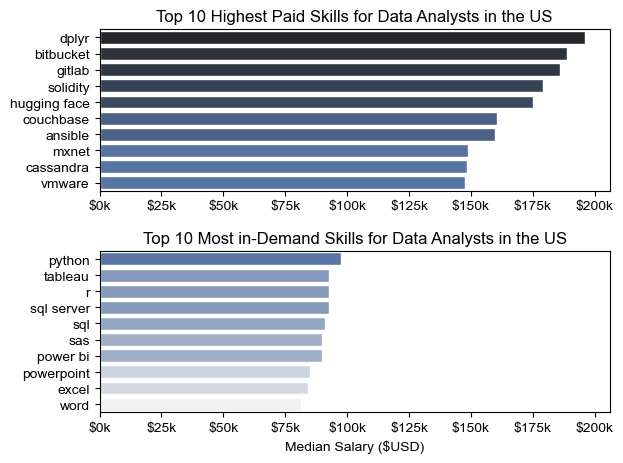

In [23]:
fig, ax = plt.subplots(2, 1,)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts in the US
sns.barplot(data=df_DA_top_pay, y=df_DA_top_pay.index, x='median', ax=ax[0], hue='median', palette ='dark:b_r')
ax[0].legend_.remove()

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))

# Top 10 Most in-Demand Skills for Data Analysts in the US
sns.barplot(data=df_DA_skills, y=df_DA_skills.index, x='median', ax=ax[1], hue='median', palette = 'light:b')
ax[1].legend_.remove()

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most in-Demand Skills for Data Analysts in the US')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))

fig.tight_layout()

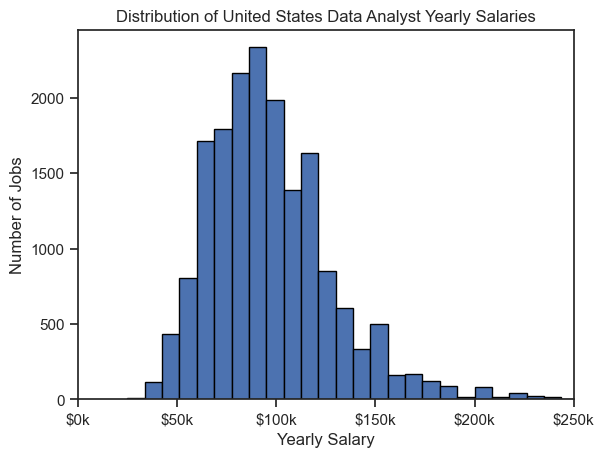

In [24]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))

plt.xlim(0, 250000)
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.show()

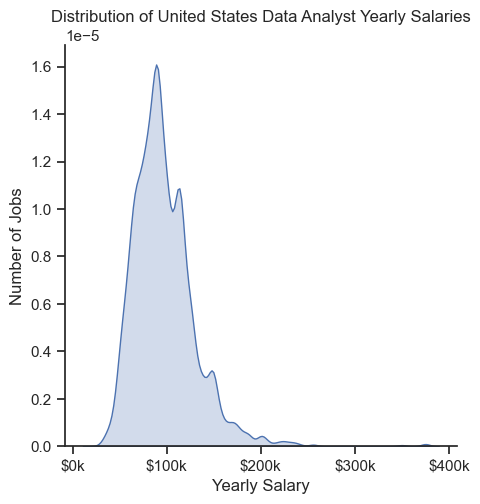

In [29]:

sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
sns.set_theme(style='ticks')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.show()

/tmp/ipykernel_6391/499965285.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


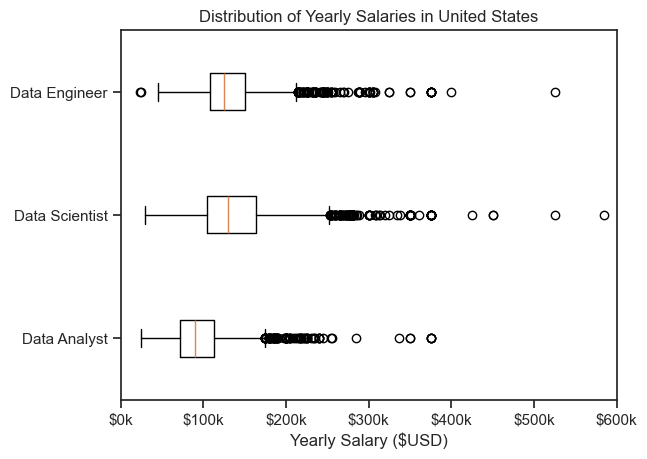

In [30]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of Yearly Salaries in United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))
plt.xlim(0, 600000)
plt.show()

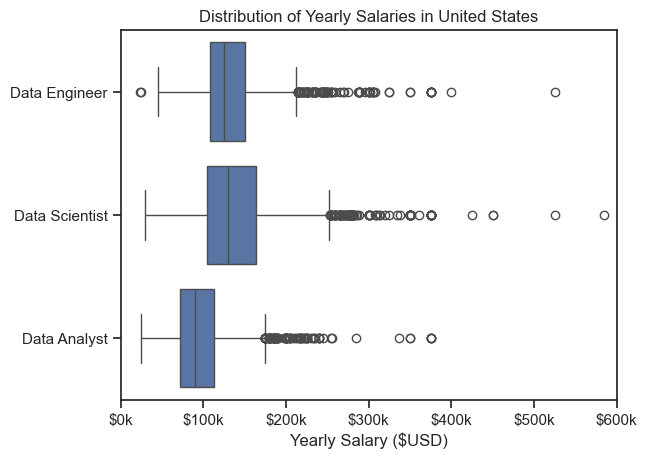

In [33]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of Yearly Salaries in United States')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda m, pos: f'${int(m/1000)}k'))
plt.xlim(0, 600000)
plt.ylabel('')
plt.show()